# Cross hedging
헷징할 자산의 선물이 유동성이 부족한 경우 유동성이 좋으면서 가격의 상관관계가 높은 자산의 선물거래를 통해 헷징한다.

ex) 항공사는 jet oil derivatives 대신 heating oil future를 들어간다.

risk exposure된 자산을 S, 그렇지 않은 자산을 F에 대하여 단순회귀선
$$ \Delta S = a + b \Delta F + \varepsilon $$ 

$$ \text{minimize}\; \Delta S - h \Delta F = \text{minimize}\; a + (b-h) \Delta F + \varepsilon$$
가 최소로 하는 $ h^{*} = b = \Huge\frac{Cov(\Delta S, \Delta F)}{Var(\Delta F)} = \rho \Huge\frac{\sigma_{S}}{\sigma_{F}}$

Hedging을 위한 최적의 Future contract 수 $N^{*}$은 다음과 같다.

$ N^{*} = h^{*} \times \Huge\frac{(헷지가\;필요한\;자산의\;수)}{(한\;계약이\;포함하는\;자산의\;수)}$

다음처럼 일정 기간동안의 jet oil의 변화와 heating oil의 변화가 주어져 있다.

회귀공식을 이용하여 $h^{*}$를 추정하고, Heding을 위한 최적의 Future contract 수 $N^{*}$를 계산해 보자.

헷지하고자 하는 jet oil은 2,000,000 gallon이고, 한 선물 계약이 포함하는 수량은 42,000 gallon이다.
![table3.2](./data/table3.2.png)

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

data = {
    'F': [0.021, 0.035, -0.046, 0.001, 0.044, -0.029, -0.026, -0.029, 0.048, -0.006, -0.036, -0.011, 0.019, -0.027, 0.029],
    'S': [0.029, 0.020, -0.044, 0.008, 0.026, -0.019, -0.010, -0.007, 0.043,  0.011, -0.036, -0.018, 0.009, -0.032, 0.023]
}
df = pd.DataFrame(data)

X = df[['F']]
Y = df[['S']]



h is 0.7776506742411755
the ideal number of contract is 37


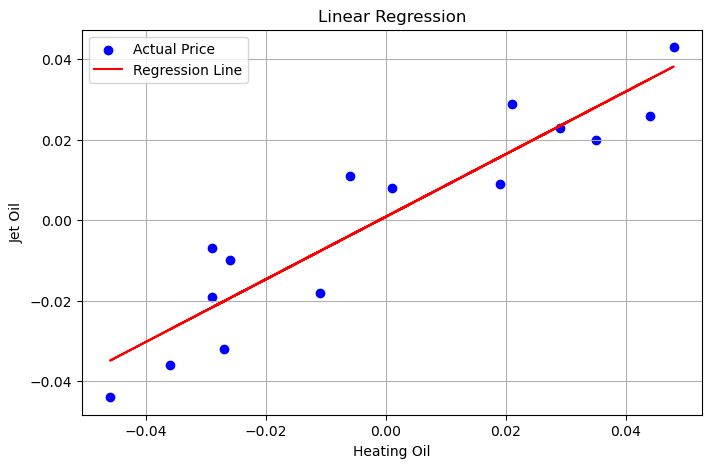

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(df['F'], df['S'], color='blue', label='Actual Price')
plt.plot(df['F'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Heating Oil')
plt.ylabel('Jet Oil')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
model = LinearRegression()
model.fit(X, Y)

h = model.coef_[0][0]
print(f"h is {h}")

print(f"the ideal number of contract is {round(h * 2000000 / 42000)}")

h is 0.7776506742411755
the ideal number of contract is 37
